In [1]:
import pandas as pd
import nosc_util
import seaborn as sns
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Load coli genome data
coli_genome_nosc_df = pd.read_csv('../data/genomes/Coli/MG1655/MG1655_ref_prot_NOSC.csv')
mask = coli_genome_nosc_df.fraction_transmembrane < 0.05
coli_soluble_nosc_df = coli_genome_nosc_df[mask]
coli_soluble_nosc_df.head()

,aa_seq,num_aas,transmembrane_aas,fraction_transmembrane,primary_accession,accessions,gene_name,description,locus_tags,GO_terms,COG_ids,KEGG_ids,isoform_accessions,b_number,Ce_total,NC,NOSC,eC_ratio,organism
2,MPELPEVETSRRGIEPHLVGATILHAVVRNGRLRWPVSEEIYRLSD...,269,0,0.0,P05523,"P05523,Q2M7U9",mutM,Formamidopyrimidine-DNA glycosylase,"mutM,fpg,b3635,JW3610","GO:0034039,GO:0140078,GO:0003684,GO:0019104,GO...",COG0266,"ecj:JW3610,eco:b3635",NaN,b3635,-231.79,1358.0,-0.170685,4.170685,coli
3,MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...,249,0,0.0,P06611,P06611,btuD,Vitamin B12 import ATP-binding protein BtuD,"btuD,b1709,JW1699","GO:0043190,GO:1990191,GO:0019898,GO:0015420,GO...",COG4138,"ecj:JW1699,eco:b1709",NaN,b1709,-157.82,1189.0,-0.132733,4.132733,coli
4,MSENKLNVIDLHKRYGEHEVLKGVSLQANAGDVISIIGSSGSGKST...,257,0,0.0,P07109,"P07109,P77299",hisP,Histidine transport ATP-binding protein HisP,"hisP,b2306,JW2303","GO:0055052,GO:0015424,GO:0005524,GO:0005291,GO...",COG4598,"ecj:JW2303,eco:b2306",NaN,b2306,-201.82,1266.0,-0.159415,4.159415,coli
5,MLRVYHSNRLDVLEALMEFIVERERLDDPFEPEMILVQSTGMAQWL...,1122,0,0.0,P07648,"P07648,Q2MA15,Q9RNX9",recC,RecBCD enzyme subunit RecC,"recC,b2822,JW2790","GO:0009338,GO:0005524,GO:0003677,GO:0003678,GO...",COG1330,"ecj:JW2790,eco:b2822",NaN,b2822,-765.59,5786.0,-0.132318,4.132318,coli
6,MKTLLPNVNTSEGCFEIGVTISNPVFTEDAINKRKQERELLNKICI...,62,0,0.0,P09557,"P09557,P77571",dicB,Division inhibition protein DicB,"dicB,b1575,JW1566","GO:0007049,GO:0051301,GO:0051782,GO:0051302",ENOG5031KUY,"ecj:JW1566,eco:b1575",NaN,b1575,-64.04,302.0,-0.212053,4.212053,coli


-0.1630795236994568 -0.11004523287667228


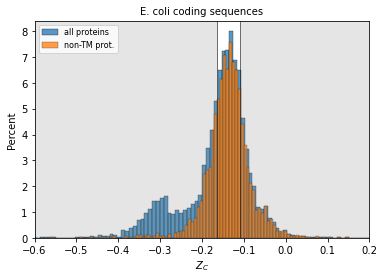

In [3]:
plt.figure()
pal = sns.color_palette()
sns.histplot(data=coli_genome_nosc_df, x='NOSC', color=pal[0], stat='percent', label='all proteins')
sns.histplot(data=coli_soluble_nosc_df, x='NOSC', color=pal[1], stat='percent', label='non-TM prot.')

genome_lb, genome_ub = coli_soluble_nosc_df.NOSC.quantile([0.25, 0.75])
print(genome_lb, genome_ub)
plt.axvspan(-0.7, genome_lb, color='grey', alpha=0.2)
plt.axvspan(genome_ub, 0.3, color='grey', alpha=0.2)
plt.axvline(genome_lb, color='k', lw=0.5)
plt.axvline(genome_ub, color='k', lw=0.5)
plt.xlim(-0.6, 0.2)
plt.title('E. coli coding sequences', fontsize=10)
plt.xlabel('$Z_C$')
plt.legend(loc=2, fontsize=8)

plt.savefig('../output/prot_eng_coli_genome_NOSC_range.png', dpi=300, facecolor='w')
plt.show()

Linear R = 0.9980983327747923


/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_11855/214873987.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]
/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_11855/214873987.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, resid, _, _ = np.linalg.lstsq(x, y)


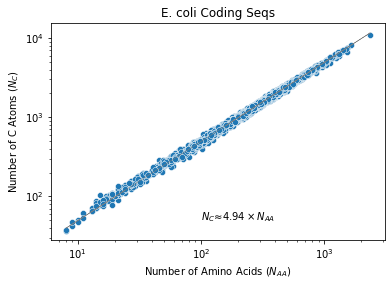

In [4]:
# number of aas should be strongly correlated with 
mask = np.logical_and(coli_genome_nosc_df.NC.notnull(),
                      coli_genome_nosc_df.num_aas.notnull())

x = coli_genome_nosc_df[mask].num_aas
y = coli_genome_nosc_df[mask].NC
R = np.corrcoef(x, y)[0,1]
print('Linear R =', R)

x = x[:,np.newaxis]
slope, resid, _, _ = np.linalg.lstsq(x, y)

plt.figure()
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=coli_genome_nosc_df, x='num_aas', y='NC')

plt.plot(x, slope*x, ls='-', color='grey', lw=0.5)
plt.xlabel('Number of Amino Acids ($N_{AA}$)')
plt.ylabel('Number of C Atoms ($N_C$)')
plt.title('E. coli Coding Seqs')
plt.text(100, 50, '$N_C ≈ {0:.2f}\\times N_{{AA}}$'.format(slope[0]))

plt.show()

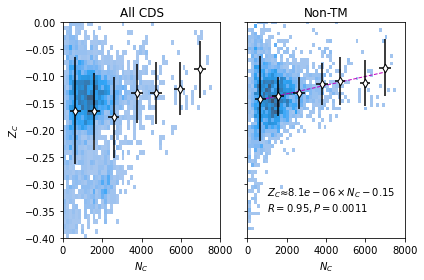

In [5]:
fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True)
plt.sca(axs[0])

sns.histplot(data=coli_genome_nosc_df, x='NC', y='NOSC')

# binned means of NC and NOSC
bins = pd.cut(coli_genome_nosc_df.NC, 10)
bin_counts = coli_genome_nosc_df.groupby(bins).count()
mask = bin_counts.aa_seq > 10

bin_means = coli_genome_nosc_df.groupby(bins).mean()
bin_stds = coli_genome_nosc_df.groupby(bins).std()

bin_means = bin_means[mask]
bin_stds = bin_stds[mask]

plt.errorbar(bin_means.NC, bin_means.NOSC,
             xerr=bin_stds.NC, yerr=bin_stds.NOSC, 
             ecolor='k', ls='', marker='', zorder=8)
plt.scatter(bin_means.NC, bin_means.NOSC, marker='d', edgecolors='k', lw=1, color='w', zorder=10)


plt.title('All CDS')
plt.xlabel('$N_C$')
plt.ylabel('$Z_C$')


plt.sca(axs[1])
sns.histplot(data=coli_soluble_nosc_df, x='NC', y='NOSC')

bins = pd.cut(coli_soluble_nosc_df.NC, 10)
bin_counts = coli_soluble_nosc_df.groupby(bins).count()
mask = bin_counts.aa_seq > 10

bin_means = coli_soluble_nosc_df.groupby(bins).mean()
bin_stds = coli_soluble_nosc_df.groupby(bins).std()

bin_means = bin_means[mask]
bin_stds = bin_stds[mask]
non_TM_bin_means = bin_means.copy()
non_TM_bin_stds = bin_stds.copy()

plt.errorbar(bin_means.NC, bin_means.NOSC,
             xerr=bin_stds.NC, yerr=bin_stds.NOSC, 
             ecolor='k', ls='', marker='', zorder=8)
plt.scatter(bin_means.NC, bin_means.NOSC, marker='d', edgecolors='k', lw=1, color='w', zorder=10)

# Fit the length dependence of ZC. 
NC_ZC_reg = stats.linregress(non_TM_bin_means.NC, non_TM_bin_means.NOSC)
pred_nosc = lambda NC: NC_ZC_reg.slope*NC + NC_ZC_reg.intercept

plt.plot(non_TM_bin_means.NC, pred_nosc(non_TM_bin_means.NC),
         color='m', lw=1, ls='--')
plt.text(1000, -0.35, '$Z_C ≈ {0:.2g}\\times N_{{C}} {1:.2f}$\n$R={2:.2f}, P={3:.2g}$'.format(
    NC_ZC_reg.slope, NC_ZC_reg.intercept, NC_ZC_reg.rvalue, NC_ZC_reg.pvalue))


plt.title('Non-TM')
plt.ylim(-0.4, 0)
plt.xlim(0, 8000)
plt.xlabel('$N_C$')
plt.tight_layout()
plt.savefig('../output/NOSC_length_dependence_coli.png', facecolor='w', dpi=300)
plt.show()

In [6]:
# Davidi et al. Rubisco data. 
davidi_df = pd.read_excel('../data/davidi2020_sup_tables.xlsx', sheet_name='spectroscopic assay')
aa_nosc_df = pd.read_csv('../data/aa_nosc.csv', index_col=0)

seqs = davidi_df['Protein seq']
n = seqs.size
tmp = pd.DataFrame(list(map(nosc_util.calc_protein_nosc, seqs, [aa_nosc_df]*n)))
tmp.columns = 'Ce_total,NC'.split(',')
davidi_df = pd.concat([davidi_df, tmp], axis=1).replace({'yes': True, 'no': False})
davidi_df['NOSC'] = davidi_df.Ce_total/davidi_df.NC
preds = pred_nosc(davidi_df.NC)
davidi_df['pred_NOSC'] = preds
davidi_df['resid_NOSC'] = davidi_df.NOSC - preds

In [7]:
madani_gen_df = pd.read_excel('../data/madani2023_sup_tables.xlsx', sheet_name='progen', na_values='-')
madani_nat_df = pd.read_excel('../data/madani2023_sup_tables.xlsx', sheet_name='natural', na_values='-')
aa_nosc_df = pd.read_csv('../data/aa_nosc.csv', index_col=0)

madani_df = pd.concat([madani_gen_df, madani_nat_df]).reset_index().drop('index', axis=1)
natural = [False]*madani_gen_df.name.size + [True]*madani_nat_df.name.size
madani_df['natural'] = natural
madani_df.head()

,name,sequence,max_ID_to_any_natural,well_expressed?,functional?,normalized_relative_activity,pfam_family,natural
0,L001,AAESYEASLTRLLKNEGGYTDHPSDPGGPTNFGITLADARRYWKGN...,0.734104,True,1.0,0.063797,NaN,False
1,L002,AAPANAASESTWDALAQCESGGNWGTSTGNGFSGGLQFTPSTWAAF...,0.887640,True,1.0,0.013768,NaN,False
2,L003,AAPVDTWDRVAQCESGGNWSINTGNGYYGGLQFSQHTWAAYGGTQY...,0.883117,True,1.0,0.105045,NaN,False
3,L004,APAFVKAEKKYGVNAIAMTSIAALESGWGKSKRAVKDNNLTGLGVY...,0.489051,False,1.0,0.012391,NaN,False
4,L005,ASAGAAPTHDWDGVAQCESGGNWGINTGNGYYGGLQFSHSTWVANG...,0.897727,False,1.0,0.008456,NaN,False


In [8]:
seqs = madani_df.sequence
n = seqs.size
tmp = pd.DataFrame(list(map(nosc_util.calc_protein_nosc, seqs, [aa_nosc_df]*n)))
tmp.columns = 'Ce_total,NC'.split(',')
madani_df = pd.concat([madani_df, tmp], axis=1)
madani_df['NOSC'] = madani_df.Ce_total/madani_df.NC
preds = pred_nosc(madani_df.NC)
madani_df['pred_NOSC'] = preds
madani_df['resid_NOSC'] = madani_df.NOSC - preds

madani_df.head()

,name,sequence,max_ID_to_any_natural,well_expressed?,functional?,normalized_relative_activity,pfam_family,natural,Ce_total,NC,NOSC,pred_NOSC,resid_NOSC
0,L001,AAESYEASLTRLLKNEGGYTDHPSDPGGPTNFGITLADARRYWKGN...,0.734104,True,1.0,0.063797,NaN,False,-71.95,821,-0.087637,-0.142191,0.054554
1,L002,AAPANAASESTWDALAQCESGGNWGTSTGNGFSGGLQFTPSTWAAF...,0.887640,True,1.0,0.013768,NaN,False,44.33,378,0.117275,-0.145779,0.263054
2,L003,AAPVDTWDRVAQCESGGNWSINTGNGYYGGLQFSQHTWAAYGGTQY...,0.883117,True,1.0,0.105045,NaN,False,8.20,359,0.022841,-0.145933,0.168774
3,L004,APAFVKAEKKYGVNAIAMTSIAALESGWGKSKRAVKDNNLTGLGVY...,0.489051,False,1.0,0.012391,NaN,False,-79.95,666,-0.120045,-0.143446,0.023401
4,L005,ASAGAAPTHDWDGVAQCESGGNWGINTGNGYYGGLQFSHSTWVANG...,0.897727,False,1.0,0.008456,NaN,False,30.29,395,0.076684,-0.145641,0.222325


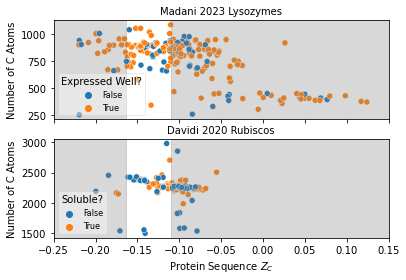

In [9]:
fig, axs = plt.subplots(nrows=2, sharex=True)

plt.sca(axs[0])
sns.scatterplot(data=madani_df, x='NOSC', y='NC', hue='well_expressed?')
plt.title('Madani 2023 Lysozymes', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Number of C Atoms', fontsize=10)
plt.axvspan(-0.3, genome_lb, color='grey', alpha=0.3)
plt.axvspan(genome_ub, 0.2, color='grey', alpha=0.3)
plt.xlim(-0.25, 0.15)
plt.legend(loc=3, fontsize=8, framealpha=0.4, title='Expressed Well?')

plt.sca(axs[1])
sns.scatterplot(data=davidi_df, x='NOSC', y='NC', hue='Soluble')
plt.title('Davidi 2020 Rubiscos', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Number of C Atoms', fontsize=10)
plt.axvspan(-0.3, genome_lb, color='grey', alpha=0.3)
plt.axvspan(genome_ub, 0.2, color='grey', alpha=0.3)
plt.xlim(-0.25, 0.15)

plt.legend(loc=3, fontsize=8, framealpha=0.4, title='Soluble?')
plt.savefig('../output/prot_eng_NOSC_expression.png', dpi=300, facecolor='w')

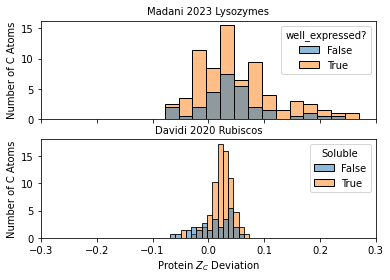

In [10]:
fig, axs = plt.subplots(nrows=2, sharex=True)

plt.sca(axs[0])
sns.histplot(data=madani_df, x='resid_NOSC', hue='well_expressed?', stat='percent')
plt.title('Madani 2023 Lysozymes', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Number of C Atoms', fontsize=10)
#plt.legend(loc=3, fontsize=8, framealpha=0.4, title='Expressed Well?')

plt.sca(axs[1])
sns.histplot(data=davidi_df, x='resid_NOSC', hue='Soluble', stat='percent')
plt.title('Davidi 2020 Rubiscos', fontsize=10)
plt.xlabel('Protein $Z_C$ Deviation', fontsize=10)
plt.ylabel('Number of C Atoms', fontsize=10)

plt.xlim(-0.3, 0.3)

#plt.legend(loc=3, fontsize=8, framealpha=0.4, title='Soluble?')
plt.savefig('../output/prot_eng_NOSC_deviation_expression.png', dpi=300, facecolor='w')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


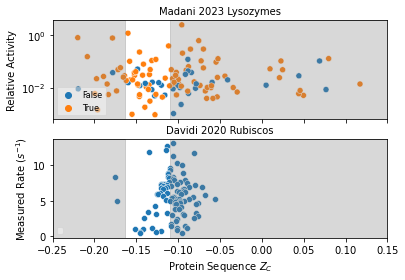

In [11]:
fig, axs = plt.subplots(nrows=2, sharex=True)

plt.sca(axs[0])
plt.yscale('log')
sns.scatterplot(data=madani_df, x='NOSC', y='normalized_relative_activity', hue='well_expressed?')
plt.title('Madani 2023 Lysozymes', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Relative Activity', fontsize=10)
plt.axvspan(-0.3, genome_lb, color='grey', alpha=0.3)
plt.axvspan(genome_ub, 0.2, color='grey', alpha=0.3)
plt.xlim(-0.25, 0.15)
plt.legend(loc=3, fontsize=8, framealpha=0.4)

plt.sca(axs[1])
sns.scatterplot(data=davidi_df, x='NOSC', y='Rate mean [s-1] ')
plt.title('Davidi 2020 Rubiscos', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Measured Rate ($s^{-1}$)', fontsize=10)
plt.axvspan(-0.3, genome_lb, color='grey', alpha=0.3)
plt.axvspan(genome_ub, 0.2, color='grey', alpha=0.3)
plt.xlim(-0.25, 0.15)

plt.legend(loc=3, fontsize=8, framealpha=0.4)
plt.savefig('../output/prot_eng_NOSC_activity.png', dpi=300, facecolor='w')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


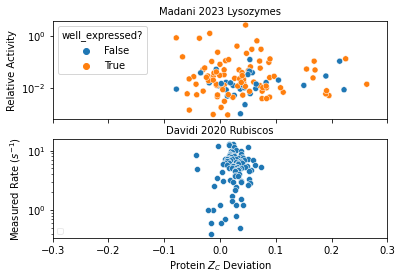

In [12]:
fig, axs = plt.subplots(nrows=2, sharex=True)

plt.sca(axs[0])
plt.yscale('log')
sns.scatterplot(data=madani_df, x='resid_NOSC', y='normalized_relative_activity', hue='well_expressed?')
plt.title('Madani 2023 Lysozymes', fontsize=10)
plt.xlabel('Protein Sequence $Z_C$', fontsize=10)
plt.ylabel('Relative Activity', fontsize=10)
plt.xlim(-0.25, 0.15)

plt.sca(axs[1])
plt.yscale('log')
sns.scatterplot(data=davidi_df, x='resid_NOSC', y='Rate mean [s-1] ')
plt.title('Davidi 2020 Rubiscos', fontsize=10)
plt.xlabel('Protein $Z_C$ Deviation', fontsize=10)
plt.ylabel('Measured Rate ($s^{-1}$)', fontsize=10)
plt.xlim(-0.3, 0.3)

plt.legend(loc=3, fontsize=8, framealpha=0.4)
plt.savefig('../output/prot_eng_NOSC_deviation_activity.png', dpi=300, facecolor='w')